<a href="https://colab.research.google.com/github/krishnagevariya05/Breast-Cancer-Detection/blob/main/RSNA_Screening_Mammography_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
import matplotlib.pyplot as plt
import pickle
import PIL
from PIL import Image
from math import exp, tanh
from tokenize import Exponent
from enum import Enum
from io import BytesIO, StringIO
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from datetime import date
from io import BytesIO
from IPython import display
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

<ipython-input-13-d0ba8f01631b>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.1722,0.2310,0.1129,0.2778,0.07012
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818
223,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.1479,0.3993,0.10640
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.1292,0.2074,0.1791,0.1070,0.3110,0.07592
17,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420


In [ ]:
y_train.head()

406    1
213    0
223    0
527    1
17     0
dtype: int64

In [ ]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

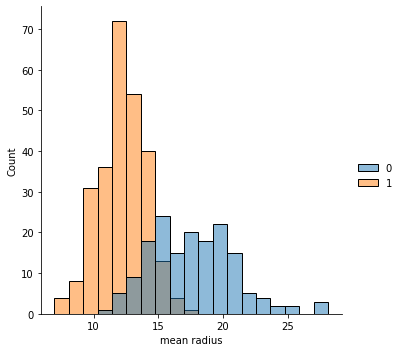

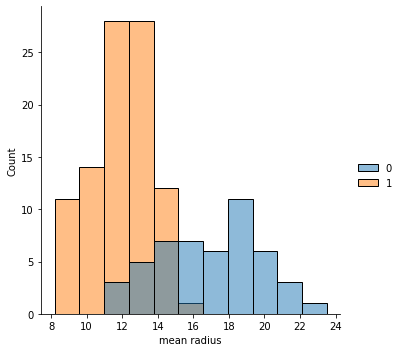

In [ ]:
# Plot the mean radius feature for both the train and test sets

sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

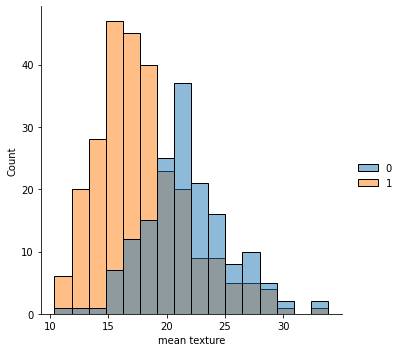

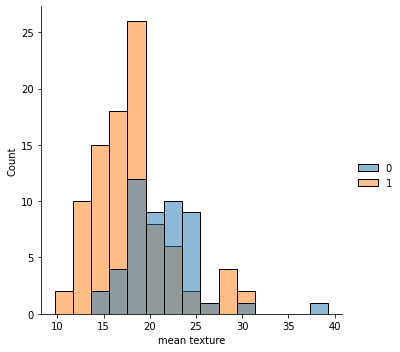

In [ ]:
# Plot the mean texture feature for both the train and test sets

sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_train = plot_to_str()

sns.displot(x=X_test['mean texture'], hue=y_test)
mean_texture_test = plot_to_str()

In [ ]:
# Create a classifier and fit the training data

clf = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
# Plot a ROC curve

#plot_roc_curve(clf, X_test, y_test)
#roc_curve = plot_to_str()

In [ ]:
# Plot a confusion matrix

#plot_confusion_matrix(clf, X_test, y_test)
#confusion_matrix = plot_to_str()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/FNA.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATADIR = "/content/drive/MyDrive/FNA"

In [ ]:
CATEGORIES = ['benign', 'malignant']

In [ ]:
import pathlib
data_dir = pathlib.Path(DATADIR)

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1737


In [ ]:
import PIL
benign = list(data_dir.glob('benign/*'))


image_count = len(list(data_dir.glob('benign/*')))
print(image_count)


1080


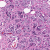

In [ ]:
import PIL
PIL.Image.open(str(benign[0]))

In [ ]:
malignant = list(data_dir.glob('malignant/*'))
PIL.Image.open(str(malignant[0]))
image_count = len(list(data_dir.glob('malignant/*')))
print(image_count)


657


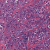

In [ ]:
import PIL
PIL.Image.open(str(malignant[0]))


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1737 files belonging to 2 classes.
Using 1390 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1737 files belonging to 2 classes.
Using 347 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


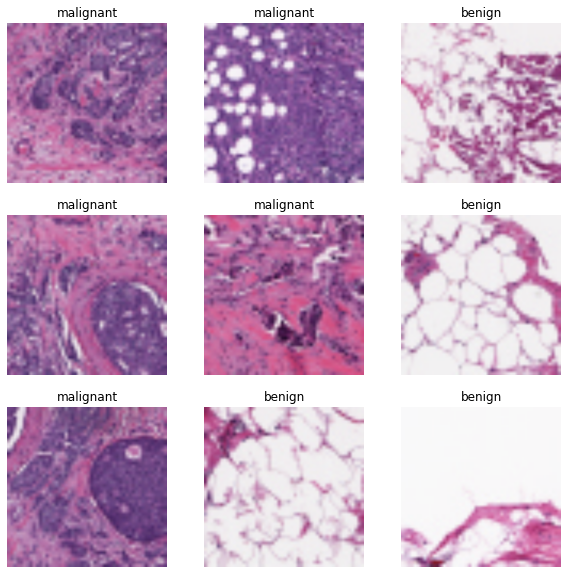

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
      print(image_batch.shape)
      print(labels_batch.shape)
      break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.12511198 0.95980406


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
44/44 [==============================] - 57s 1s/step - loss: 0.5836 - accuracy: 0.7165 - val_loss: 0.3972 - val_accuracy: 0.8271
Epoch 2/10
44/44 [==============================] - 58s 1s/step - loss: 0.3526 - accuracy: 0.8662 - val_loss: 0.4473 - val_accuracy: 0.8127
Epoch 3/10
44/44 [==============================] - 58s 1s/step - loss: 0.2976 - accuracy: 0.8957 - val_loss: 0.2834 - val_accuracy: 0.8991
Epoch 4/10
44/44 [==============================] - 55s 1s/step - loss: 0.2832 - accuracy: 0.8978 - val_loss: 0.3450 - val_accuracy: 0.8674
Epoch 5/10
44/44 [==============================] - 57s 1s/step - loss: 0.2633 - accuracy: 0.9058 - val_loss: 0.3030 - val_accuracy: 0.8905
Epoch 6/10
44/44 [==============================] - 60s 1s/step - loss: 0.2179 - accuracy: 0.9194 - val_loss: 0.2966 - val_accuracy: 0.9020
Epoch 7/10
44/44 [==============================] - 60s 1s/step - loss: 0.1971 - accuracy: 0.9281 - val_loss: 0.3104 - val_accuracy: 0.8991
Epoch 8/10
44/44 [==

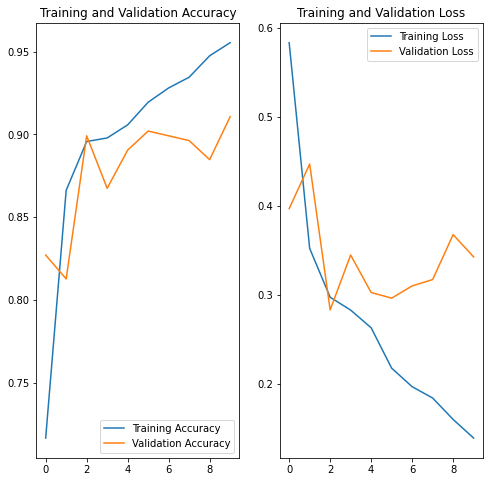

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

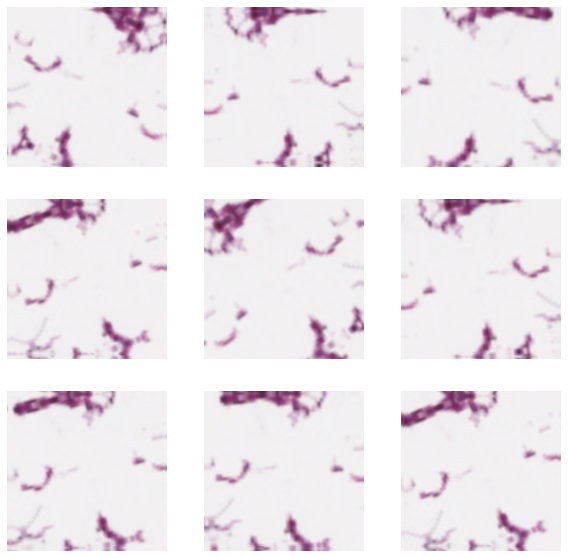

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

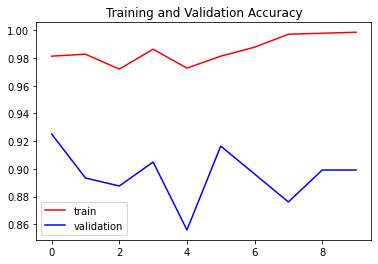

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


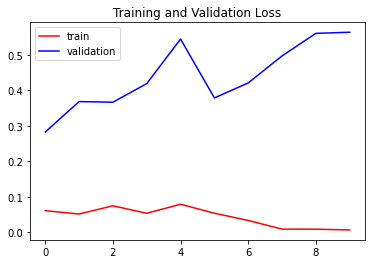

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
     

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:

epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
44/44 [==============================] - 64s 1s/step - loss: 0.0054 - accuracy: 0.9993 - val_loss: 0.8385 - val_accuracy: 0.9049
Epoch 2/15
44/44 [==============================] - 57s 1s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.8766 - val_accuracy: 0.9107
Epoch 3/15
44/44 [==============================] - 58s 1s/step - loss: 0.0142 - accuracy: 0.9964 - val_loss: 0.6265 - val_accuracy: 0.8790
Epoch 4/15
44/44 [==============================] - 53s 1s/step - loss: 0.0727 - accuracy: 0.9698 - val_loss: 0.6382 - val_accuracy: 0.8646
Epoch 5/15
44/44 [==============================] - 54s 1s/step - loss: 0.0171 - accuracy: 0.9964 - val_loss: 0.8119 - val_accuracy: 0.8847
Epoch 6/15
44/44 [==============================] - 53s 1s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.9024 - val_accuracy: 0.8818
Epoch 7/15
44/44 [==============================] - 55s 1s/step - loss: 9.9629e-04 - accuracy: 1.0000 - val_loss: 0.9953 - val_accuracy: 0.8876
Epoch 8/15
44/44

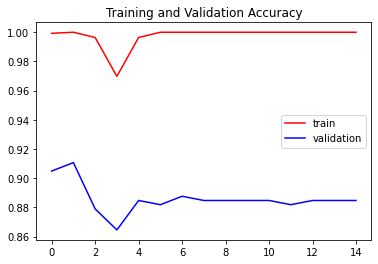

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

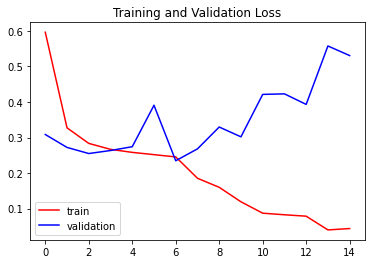

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
DATADIR = "/content/FNA/malignant/10254_idx5_x1651_y1001_class1.png"

In [ ]:

data_dir = pathlib.Path(DATADIR)

In [ ]:
img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 187ms/step
This image most likely belongs to malignant with a 100.00 percent confidence.


In [ ]:
tf.keras.models.save_model(model,'my_model.h5')